In [20]:
import os

import matplotlib.pyplot as plt
from monai.data import ArrayDataset
from monai.transforms import Resize, EnsureChannelFirst, Compose, LoadImage, ScaleIntensity
from monai.utils import first
from torch.utils.data import DataLoader
import torch

image_size = (160, 160)

transformer = Compose([LoadImage(),
                       EnsureChannelFirst(),
                       ScaleIntensity(),
                       Resize(image_size)])

train_image_path = "data/REFUGE2/Train/Images/"
train_dm_path = "data/REFUGE2/Train/Disc_Masks/"
test_image_path = "data/REFUGE2/Test/Images/"
test_dm_path = "data/REFUGE2/Test/Disc_Masks/"
val_image_path = "data/REFUGE2/Validation/Images/"
val_dm_path = "data/REFUGE2/Validation/Disc_Masks/"

data = ArrayDataset(img=sorted([val_image_path + file for file in os.listdir(val_image_path)]),
                    img_transform=transformer,
                    seg=sorted([val_dm_path + file for file in os.listdir(val_dm_path)]),
                    seg_transform=transformer)

dataloader = DataLoader(data, batch_size=4, shuffle=False)

In [21]:
def plot_sample(sample):
    fig, (img1, img2) = plt.subplots(1, 2, layout="constrained")

    img1.imshow(sample[0].permute(1, 2, 0))
    img1.set_axis_off()
    img2.imshow(sample[1].permute(1, 2, 0))
    img2.set_axis_off()
    plt.show()

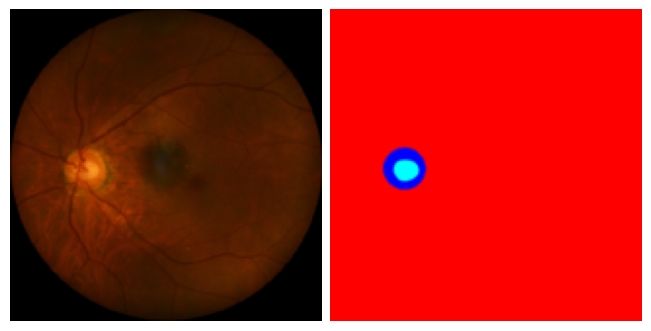

In [24]:
img, seg = first(dataloader)
plot_sample([img[0], seg[0]])



In [26]:
A = torch.nonzero(seg[:, 1])
B = torch.nonzero([A[0] == 0])

TypeError: nonzero(): argument 'input' (position 1) must be Tensor, not list